# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB


In [2]:
data_url = "attrition.csv"
df = pd.read_csv(data_url)

In [3]:
pd.set_option('display.max_columns', None)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [4]:
#df.info() 

In [5]:
cat_feat=["BusinessTravel", "Department", "EducationField","Gender","JobRole",
            "MaritalStatus", "OverTime" ]

num_feat=['Age','DailyRate','DistanceFromHome', 'HourlyRate' , 'MonthlyIncome' , 'MonthlyRate' , 
            'PercentSalaryHike' , 'TotalWorkingYears' , 'YearsAtCompany' , 'YearsInCurrentRole'
         , 'YearsSinceLastPromotion' , 'YearsWithCurrManager' ]

In [6]:
for i in df.columns:
   # print(i, ':' ,df[i].unique())
    print(df[i].nunique())  #counting unique values

43
2
3
719
3
29
5
6
1
1028
4
2
71
4
5
9
4
3
966
1011
10
2
15
2
4
4
40
7
4
35
19
16
18
1028


In [7]:
df.drop("EmployeeNumber",axis=1,inplace=True)
df.drop("ID",inplace=True,axis=1)
df.drop("EmployeeCount",inplace=True,axis=1)

In [8]:
label_col=df["Attrition"]
df.drop("Attrition", axis=1,inplace=True)

In [9]:
for i in cat_feat:
    enc = preprocessing.LabelEncoder()
    enc.fit(df[i])
    enc_cat_features = enc.transform(df[i] )
    df[i]= np.int64(enc_cat_features)
    
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


### Proceeding without feature scaling and selection:

In [10]:
X=df
Y=label_col
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)                                   

Random Forest Classifier

In [11]:
test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train) ########predict??
    test_predictions = rfc.predict(X_test)
    ##########shortcut tweak
    if i==4:
        predictions=test_predictions
        probs= rfc.predict_proba(X_test)
        probs=probs[:,1]
        fper, tper, thresholds = roc_curve(y_test, probs)
        auc1 = auc(fper, tper)
        

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.91, 0.92, 0.97, 0.96, 0.98, 0.98, 0.99, 1.0]
The testing scores were: [0.78, 0.82, 0.83, 0.84, 0.83, 0.83, 0.84, 0.83]


In [12]:
print(confusion_matrix(y_test, predictions))
print("---- For rfc -----")
print(classification_report(y_test, predictions))

[[168   4]
 [ 29   5]]
---- For rfc -----
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       172
           1       0.56      0.15      0.23        34

    accuracy                           0.84       206
   macro avg       0.70      0.56      0.57       206
weighted avg       0.80      0.84      0.80       206



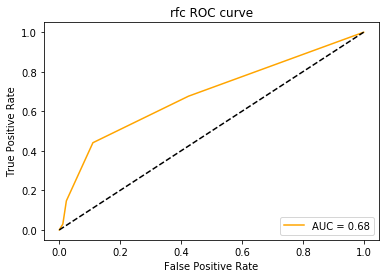

In [13]:
plt.plot(fper, tper, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfc ROC curve')
# show the plot
plt.show()

XGB Classifier

In [14]:
xgb_clf= xgb.XGBClassifier(learning_rate=0.04)
xgb_model = xgb_clf.fit(X_train , y_train)
predictions = xgb_model.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
print(accuracy)
predictions = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9817518248175182


0.8349514563106796

In [15]:
print(confusion_matrix(y_test, predictions))
print("---- For XGB -----")
print(classification_report(y_test, predictions))

[[163   9]
 [ 25   9]]
---- For XGB -----
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       172
           1       0.50      0.26      0.35        34

    accuracy                           0.83       206
   macro avg       0.68      0.61      0.63       206
weighted avg       0.81      0.83      0.81       206



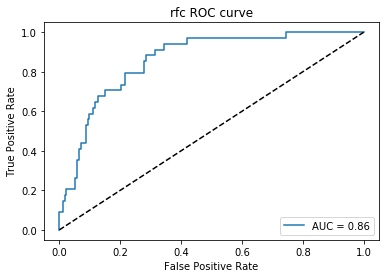

In [16]:
probs= xgb_model.predict_proba(X_test)
probs=probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
auc1 = auc(fper, tper)
plt.plot(fper, tper, label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfc ROC curve')
# show the plot
plt.show()

### Naive Bayes Model

Only numeric features used

In [17]:
Features = np.empty((1028,1))
Features = np.concatenate([Features, np.array(df[num_feat[:]])], axis = 1)
Features.shape

(1028, 13)

In [18]:
indx = range(Features.shape[0])
indx = train_test_split(indx, test_size = np.int(Features.shape[0]*0.2))
X_train = Features[indx[0],:]
y_train = np.ravel(label_col[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(label_col[indx[1]])
y_test.shape

(205,)

In [33]:
NB_mod = GaussianNB(var_smoothing=1e-01)
NB_mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.1)

In [34]:
predictions = NB_mod.predict(X_test)
print(confusion_matrix(y_test, predictions))
print("---- For XGB -----")
print(classification_report(y_test, predictions))

[[170   0]
 [ 35   0]]
---- For XGB -----
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       170
           1       0.00      0.00      0.00        35

    accuracy                           0.83       205
   macro avg       0.41      0.50      0.45       205
weighted avg       0.69      0.83      0.75       205



C:\Users\prakash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


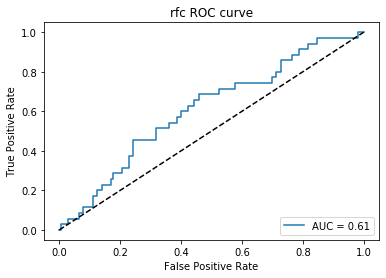

In [35]:
probs= NB_mod.predict_proba(X_test)
probs=probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
auc1 = auc(fper, tper)
plt.plot(fper, tper, label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfc ROC curve')
# show the plot
plt.show()

### Feature scaling and selection:

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  